# 0. Setup Paths

In [7]:
import os

In [8]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [9]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [10]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [61]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [62]:
# https://www.tensorflow.org/install/source_windows

In [63]:
if os.name=='nt':
    !pip install wget
    import wget

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
   !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
C:\Users\bengi\AppData\Local\Temp\easy_install-1527b2l1\apache-beam-2.33.0\setup.py:253: UserWarning: This version of Apache Beam has not been sufficiently tested on Python 3.9. You may encounter bugs or missing features.
  warnings.warn(
C:\Users\bengi\AppData\Local\Programs\Python\Python39\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\bengi\AppData\Local\Temp\easy_install-1527b2l1\apache-beam-2.33.0\apache_beam\coders\coder_impl.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
C:\Users\bengi\AppData\Local\Programs\Pytho


running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_anchor_generator_pb2.py ->

byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_ppn_feature_extractor_testbase.py to ssd_resnet_v1_ppn_feature_extractor_testbase.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_ppn_feature_extractor_tf1_test.py to ssd_resnet_v1_ppn_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_spaghettinet_feature_extractor.py to ssd_spaghettinet_feature_extractor.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_spaghettinet_feature_extractor_tf1_test.py to ssd_spaghettinet_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\__init__.py to __init__.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\model_hparams.py to model_hparams.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\model_lib.py to model_lib.cpython-39.pyc
byte-com

Obtaining file:///C:/Users/bengi/tensor/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-10-28 18:55:40.016275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-10-28 18:55:40.016357: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-28 18:56:06.176063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-10-28 18:56:06.196179: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-28 18:56:06.205278: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-0FTJA3F6
2021-10-28 18:56:06.205542: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-0FTJA3F6
Running tests under Python 3.9.5: C:\Users\bengi\AppData\Local\Programs\Python\Python39\python.exe
[ RUN  

In [27]:
#pip install matplotlib

  Using cached matplotlib-3.4.3-cp39-cp39-win_amd64.whl (7.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires Cython, which is not installed.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, whic

In [30]:
#pip install pyyaml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires Cython, which is not installed.
tf-models-official 2.6.0 requires gin-config, which is not installed.


tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.6.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.6.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.6.0 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires sacrebleu, which is not installed.
tf-models-official 2.6.0 requires sentencepiece, which is not installed.
tf-models-official 2.6.0 requires seqeval, which is not installed.
tf-models-official 2.6.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.6.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.6.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-offic

In [28]:
#pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [21]:
#!pip install tensorflow --upgrade

  Using cached tensorflow-2.6.0-cp39-cp39-win_amd64.whl (423.3 MB)
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached clang-5.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires Cython, which is not installed.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-mod

In [25]:
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.0


Uninstalling protobuf-3.19.0:
  Successfully uninstalled protobuf-3.19.0

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\bengi\tensor\metsys\scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bengi\\AppData\\Local\\Temp\\pip-install-c2q8u_80\\matplotlib_0bd4042ba9114164bdf59b718ae7ad08\\setup.py'"'"'; __file__='"'"'C:\\Users\\bengi\\AppData\\Local\\Temp\\pip-install-c2q8u_80\\matplotlib_0bd4042ba9114164bdf59b718ae7ad08\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bengi\AppData\Local\Temp\pip-wheel-krfwik86'
       cwd: C:\Users\bengi\AppData\Local\Temp\pip-install-c2q8u_80\matplotlib_0bd4042ba9114164bdf59b718ae7ad08\
  Complete output (577 lines):
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING


  Using cached protobuf-3.19.0-cp39-cp39-win_amd64.whl (895 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'



  copying lib\matplotlib\mpl-data\fonts\afm\pncri8a.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\fonts\ttf\cmr10.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\mpl-data\stylelib\classic.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\sample_data\grace_hopper.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\sample_data
  copying lib\matplotlib\backends\web_backend\css\boilerplate.css -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\css
  copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Times-BoldItalic.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\pdfcorefonts
  copying lib\matplotlib\mpl-data\fonts\ttf\DejaVuSansDisplay.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\mpl-data\fonts\ttf\DejaVuSerifDisplay.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
  copying lib\matplot

In [2]:
!pip list

Package                 Version   Editable project location
----------------------- --------- -----------------------------------------------------
absl-py                 0.15.0
anyio                   3.3.2
apache-beam             2.33.0
argon2-cffi             21.1.0
astunparse              1.6.3
attrs                   21.2.0
avro-python3            1.10.2
Babel                   2.9.1
backcall                0.2.0
bleach                  4.1.0
cachetools              4.2.4
certifi                 2021.5.30
cffi                    1.14.6
charset-normalizer      2.0.6
clang                   5.0
colorama                0.4.4
contextlib2             21.6.0
cycler                  0.10.0
Cython                  0.29.24
debugpy                 1.4.3
decorator               5.1.0
defusedxml              0.7.1
easyocr                 1.4.1
entrypoints             0.3
flatbuffers             1.12
gast                    0.4.0
google-auth             2.3.1
google-auth-oauthlib    0.4.6
goo

In [64]:
import object_detection

In [65]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [66]:
labels = [{'name':'meter', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [67]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [68]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [69]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Tensorflow\workspace\images\train
Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Tensorflow\workspace\images\test
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [13]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [70]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [71]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [72]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [73]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [20]:
#pip install pycocotools-windows==2.0.0.2
#pip install gin config==0.01
#pip install tensorflow_addons

In [21]:
#pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

In [22]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [24]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [26]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [12]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [13]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    print(detections)
    return detections

# 9. Detect from an Image

In [14]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [16]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '20.jpg')

{'detection_boxes': <tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_6:0' shape=(1, 100, 4) dtype=float32>, 'detection_scores': <tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_7:0' shape=(1, 100) dtype=float32>, 'detection_classes': <tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_8:0' shape=(1, 100) dtype=float32>, 'num_detections': <tf.Tensor 'Postprocessor/Cast_4:0' shape=(1,) dtype=float32>, 'raw_detection_boxes': <tf.Tensor 'Postprocessor/Squeeze:0' shape=(1, 12804, 4) dtype=float32>, 'raw_detection_scores': <tf.Tensor 'Postprocessor/convert_scores:0' shape=(1, 12804, 2) dtype=float32>, 'detection_multiclass_scores': <tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_11:0' shape=(1, 100, 2) dtype=float32>, 'detection_anchor_indices': <tf.Tensor 'Postprocessor/Cast_5:0' shape=(1, 100) dtype=int32>}
{'detection_boxes': <tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_6:0' shape=(1, 100, 4) dtype=float32>,

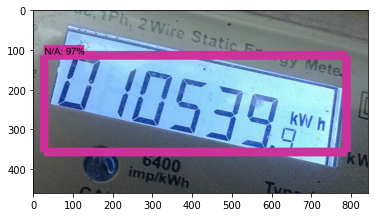

In [17]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset+22,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            track_ids=None,
            line_thickness=22,
            min_score_thresh=.9,
            agnostic_mode=False)

print(max(detections))
img = cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2GRAY))
plt.show()

# 10.Easy OCR

In [34]:
#pip install easyocr

  Using cached easyocr-1.4.1-py3-none-any.whl (63.6 MB)
  Using cached Pillow-8.2.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached scikit_image-0.18.3-cp39-cp39-win_amd64.whl (12.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\bengi\tensor\metsys\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\bengi\tensor\metsys\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\bengi\tensor\metsys\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\bengi\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 455, in read
    n = self.readinto(b)
  File "C:\Users\bengi\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 499, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\bengi\AppData\Local\Programs\Python\Python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\bengi\AppData\Local\Programs\Python\Python39\lib\ssl.py", line 1241, in recv_into
    return self.rea

In [18]:
import easyocr

In [19]:
detection_threshold=0.7

In [20]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [21]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.24826065 0.03266004 0.7748705  0.9367579 ]
[114.19989765  27.53241143 356.44043684 789.68692839]
[([[611, 135], [715, 135], [715, 197], [611, 197]], 'kW h', 0.5224756187259845), ([[660.2968374460654, 0.062289697966071866], [759.9879890880212, 27.6902532747168], [748.7031625539346, 63.93771030203393], [649.0120109119788, 36.309746725283205]], 'Mete:', 0.9695475418753314), ([[200.05074503958434, -0.9785346251859615], [624.7580277687464, 94.82127649016877], [576.9492549604156, 261.97853462518594], [152.2419722312536, 167.17872350983123]], '{0s39', 0.051995261974006265)]


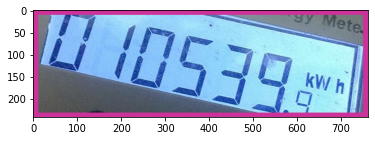

In [22]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [40]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])
    print(result[2])

62
kW h
0.5224756187259845
24.962630493230506
Mete:
0.9695475418753314
119.34848532668639
{0s39
0.051995261974006265


# 11. OCR filtering

In [45]:

region_threshold = 0.3

In [44]:
    for result in ocr_result:
        print(np.sum(np.subtract(result[0][1], result[0][0]))*np.sum(np.subtract(result[0][2], result[0][1])))
        print(region.shape[0]*region.shape[1])
        

6448
184404
3178.2200279296117
184404
62121.73325213849
184404


In [46]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    meter = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            meter.append(result[1])
    return meter

# 12. Further filtering

In [47]:

region_threshold = 0.3

In [48]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


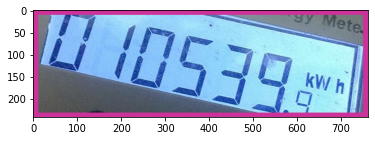

['{0s39']


In [49]:
    text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# 12.Save results

In [50]:
import csv
import uuid

In [51]:
'{}.jpg'.format(uuid.uuid1())

'ce14a5c4-461d-11ec-b66a-a08cfd3527a9.jpg'

In [53]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [ ]:
save_results(text, region, 'detection_results.csv', 'Detected_Images')